importing modules

In [2]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models 
from keras.datasets import mnist 
from keras.datasets import cifar10
import time
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

data manipulation

In [3]:
gpus = tf.config.list_physical_devices('GPU')


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255







RMSprop optimization

In [4]:
model_1 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_1.summary()

model_1.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T1= time.time()
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T2= time.time()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 4s 63ms/step - loss: 1.9682 - accuracy: 0.4086 - val_loss: 1.6708 - val_accuracy: 0.6143
Epoch 2/500
10/10 [==============================] - 0s 18ms/step - loss: 1.5200 - accuracy: 0.6781 - val_loss: 1.3698 - val_accuracy: 0.7393
Epoch 3/500
10/10 [==============================] - 0s 18ms/step - loss: 1.2668 - accuracy: 0.7597 - val_loss: 1.1640 - val_accuracy: 0.7866
Epoch 4/500
10/10 [==============================] - 0s 16ms/step - loss: 1.0875 - accuracy: 0.7923 - val_loss: 1.0126 - val_accuracy: 0.8094
Epoch 5/500
10

evaluating 

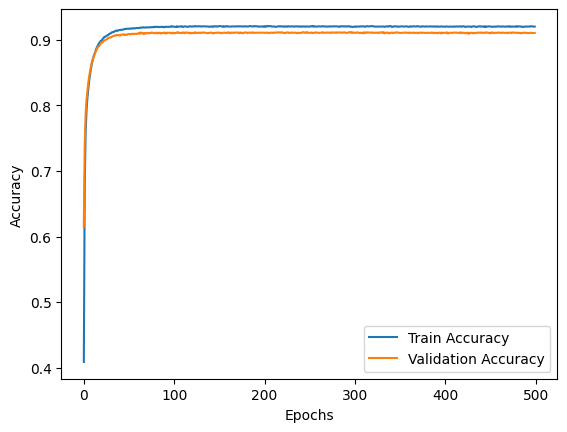

313/313 [==============================] - 1s 3ms/step - loss: 0.3757 - accuracy: 0.9166
Test Loss: 0.3756871819496155
Test Accuracy: 0.9165999889373779
Time taken: 77.76162505149841


In [5]:
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_1.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T2-T1}')

Nadam

In [7]:
model_2 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_2.summary()

model_2.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T3= time.time()
history_2 = model_2.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T4= time.time()

Model: "sequential_2"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 40ms/step - loss: 2.1698 - accuracy: 0.2464 - val_loss: 1.9770 - val_accuracy: 0.4118
Epoch 2/500
10/10 [==============================] - 0s 19ms/step - loss: 1.8166 - accuracy: 0.5286 - val_loss: 1.6521 - val_accuracy: 0.6382
Epoch 3/500
10/10 [==============================] - 0s 17ms/step - loss: 1.5204 - accuracy: 0.6798 - val_loss: 1.3955 - val_accuracy: 0.7271
Epoch 4/500
10/10 [==============================] - 0s 20ms/step - loss: 1.2956 - accuracy: 0.7462 - val_loss: 1.2060 - val_accuracy: 0.7701
Epoch 5/500
10/10 [===============

evaluating

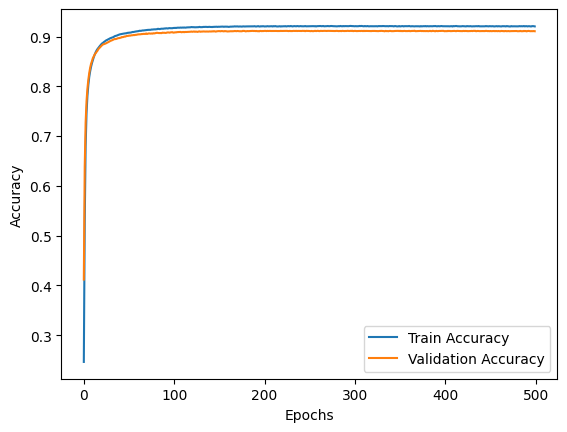

313/313 [==============================] - 1s 3ms/step - loss: 0.3753 - accuracy: 0.9171
Test Loss: 0.3752516508102417
Test Accuracy: 0.9171000123023987
Time taken: 78.587149143219


In [8]:
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_2.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T4-T3}')

NAG

In [9]:
model_3 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_3.summary()

model_3.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T5= time.time()
history_3 = model_3.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T6= time.time()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 39ms/step - loss: 2.4946 - accuracy: 0.0677 - val_loss: 2.4478 - val_accuracy: 0.0772
Epoch 2/500
10/10 [==============================] - 0s 18ms/step - loss: 2.4069 - accuracy: 0.0870 - val_loss: 2.3467 - val_accuracy: 0.1073
Epoch 3/500
10/10 [==============================] - 0s 16ms/step - loss: 2.3012 - accuracy: 0.1295 - val_loss: 2.2436 - val_accuracy: 0.1625
Epoch 4/500
10/10 [==============================] - 0s 19ms/step - loss: 2.1993 - accuracy: 0.1930 - val_loss: 2.1469 - val_accuracy: 0.2407
Epoch 5/500


evaluating

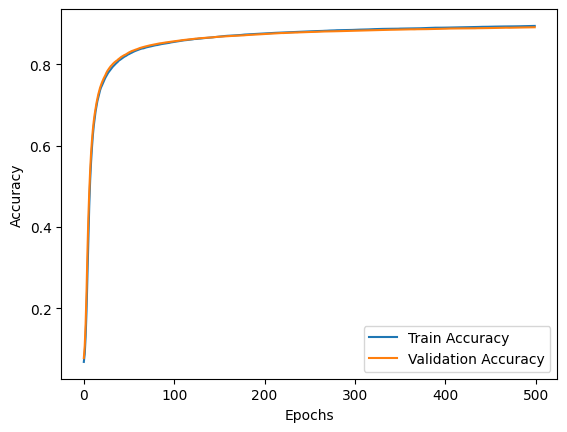

313/313 [==============================] - 1s 3ms/step - loss: 0.4314 - accuracy: 0.9004
Test Loss: 0.43144315481185913
Test Accuracy: 0.9003999829292297
Time taken: 72.90701508522034


In [10]:
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_3.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T6-T5}')

SGDR

In [11]:
initial_lr = 0.01
t_0 = 10  # Number of steps for the first cycle
t_mult = 2  # Factor by which t_0 is multiplied after each cycle

lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=initial_lr,
    first_decay_steps=t_0,
    t_mul=t_mult
)

model_4 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_4.summary()

model_4.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T7= time.time()
history_4 = model_4.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T8= time.time()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 53ms/step - loss: 2.4173 - accuracy: 0.1279 - val_loss: 2.3900 - val_accuracy: 0.1345
Epoch 2/500
10/10 [==============================] - 0s 21ms/step - loss: 2.3350 - accuracy: 0.1598 - val_loss: 2.2863 - val_accuracy: 0.1834
Epoch 3/500
10/10 [==============================] - 0s 16ms/step - loss: 2.2677 - accuracy: 0.1977 - val_loss: 2.2631 - val_accuracy: 0.1969
Epoch 4/500
10/10 [==============================] - 0s 16ms/step - loss: 2.2132 - accuracy: 0.2320 - val_loss: 2.1647 - val_accuracy: 0.2638
Epoch 5/500


evaluating

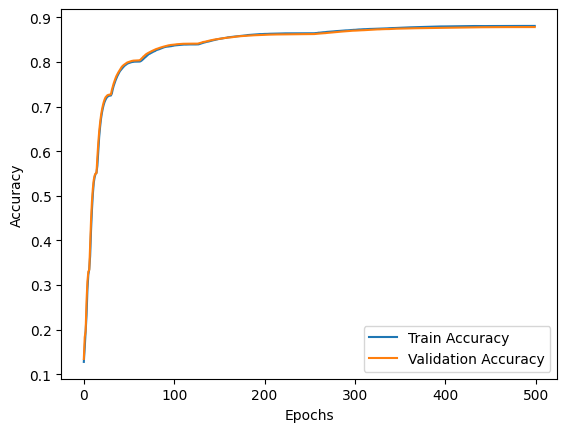

313/313 [==============================] - 1s 3ms/step - loss: 0.4851 - accuracy: 0.8879
Test Loss: 0.48510098457336426
Test Accuracy: 0.8878999948501587
Time taken: 77.25892281532288


In [12]:
plt.plot(history_4.history['accuracy'], label='Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_4.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T8-T7}')

Learning Rate Schedulers(Exponential Decay)

In [13]:
initial_lr = 0.01  # Starting learning rate
decay_rate = 0.1   # Factor by which the learning rate decays
decay_steps = 1000 # How often to apply the decay

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=False  # If True, applies decay in discrete intervals (staircase effect)
)

model_5 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_5.summary()
model_5.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T9= time.time()
history_5 = model_5.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T10= time.time()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
10/10 [==============================] - 1s 36ms/step - loss: 2.3705 - accuracy: 0.1323 - val_loss: 2.2981 - val_accuracy: 0.1694
Epoch 2/500
10/10 [==============================] - 0s 17ms/step - loss: 2.2424 - accuracy: 0.2096 - val_loss: 2.1868 - val_accuracy: 0.2570
Epoch 3/500
10/10 [==============================] - 0s 15ms/step - loss: 2.1395 - accuracy: 0.2993 - val_loss: 2.0934 - val_accuracy: 0.3460
Epoch 4/500
10/10 [==============================] - 0s 15ms/step - loss: 2.0512 - accuracy: 0.3843 - val_loss: 2.0114 - val_accuracy: 0.4275
Epoch 5/500
10/10 [==============================] - 0s 15ms/step - loss: 1.9729 - accuracy: 0.4571 - val_loss: 1.9381 - val_accuracy: 0.4920
Epoch 6/500
10/10 [==============================] - 0s 17ms/step - loss: 1.9025 - accuracy: 0.5128 - val_loss: 1.8717 - val_accuracy: 0.5391
Epoch 7/500
10/10 [==============================] - 0s 15ms/step - loss: 1.8386 - accuracy: 0.5531 - val_loss: 1.8114 - val_accuracy: 0.5760
Epoch 

evaluating

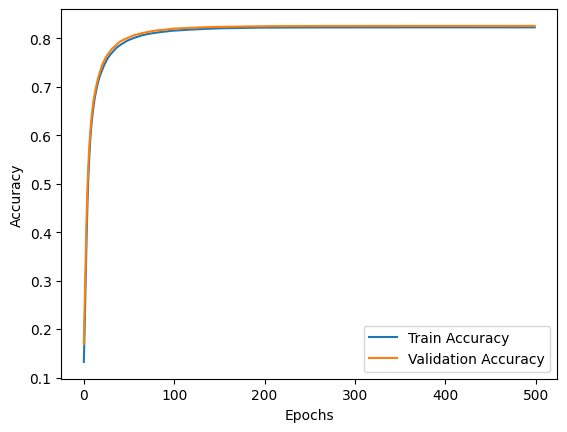

313/313 [==============================] - 1s 3ms/step - loss: 0.8584 - accuracy: 0.8323
Test Loss: 0.8583649396896362
Test Accuracy: 0.8323000073432922
Time taken: 73.79125261306763


In [14]:
plt.plot(history_5.history['accuracy'], label='Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_5.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T10-T9}')

Learning Rate Schedulers(Step Decay)

In [15]:
initial_lr = 0.01  # Initial learning rate
decay_steps = [1000, 2000, 3000]  # Step intervals at which the learning rate drops
lr_values = [initial_lr, 0.005, 0.001, 0.0001]  # Learning rates at each interval

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=decay_steps,
    values=lr_values
)

model_6 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_6.summary()
model_6.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T11= time.time()
history_6 = model_6.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T12= time.time()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 50ms/step - loss: 2.3619 - accuracy: 0.0943 - val_loss: 2.2939 - val_accuracy: 0.1277
Epoch 2/500
10/10 [==============================] - 0s 16ms/step - loss: 2.2436 - accuracy: 0.1705 - val_loss: 2.1871 - val_accuracy: 0.2242
Epoch 3/500
10/10 [==============================] - 0s 15ms/step - loss: 2.1408 - accuracy: 0.2813 - val_loss: 2.0923 - val_accuracy: 0.3341
Epoch 4/500
10/10 [==============================] - 0s 14ms/step - loss: 2.0489 - accuracy: 0.3874 - val_loss: 2.0063 - val_accuracy: 0.4237
Epoch 5/500


evaluating

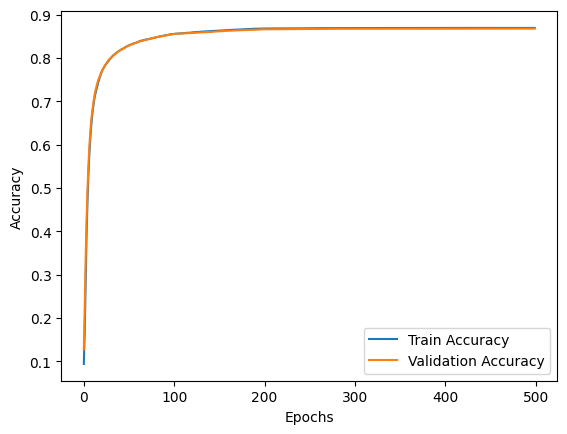

313/313 [==============================] - 1s 3ms/step - loss: 0.5412 - accuracy: 0.8798
Test Loss: 0.5412477850914001
Test Accuracy: 0.879800021648407
Time taken: 73.72916507720947


In [16]:
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_6.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T12-T11}')

In [17]:
model_6 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.000001))
    ]
)
model_6.summary()
model_6.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T11= time.time()
history_6 = model_6.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T12= time.time()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
10/10 [==============================] - 0s 31ms/step - loss: 2.3142 - accuracy: 0.1508 - val_loss: 2.3085 - val_accuracy: 0.1546
Epoch 2/500
10/10 [==============================] - 0s 15ms/step - loss: 2.2999 - accuracy: 0.1588 - val_loss: 2.2946 - val_accuracy: 0.1629
Epoch 3/500
10/10 [==============================] - 0s 15ms/step - loss: 2.2860 - accuracy: 0.1671 - val_loss: 2.2811 - val_accuracy: 0.1723
Epoch 4/500
10/10 [==============================] - 0s 17ms/step - loss: 2.2725 - accuracy: 0.1757 - val_loss: 2.2681 - val_accuracy: 0.1810
Epoch 5/500
10/10 [==============================] - 0s 17ms/step - loss: 2.2595 - accuracy: 0.1847 - val_loss: 2.2553 - val_accuracy: 0.1892
Epoch 6/500
10/10 [==============================] - 0s 14ms/step - loss: 2.2468 - accuracy: 0.1947 - val_loss: 2.2430 - val_accuracy: 0.1985
Epoch 7/500
10/10 [==============================] - 0s 15ms/step - loss: 2.2344 - accuracy: 0.2040 - val_loss: 2.2309 - val_accuracy: 0.2078
Epoch 

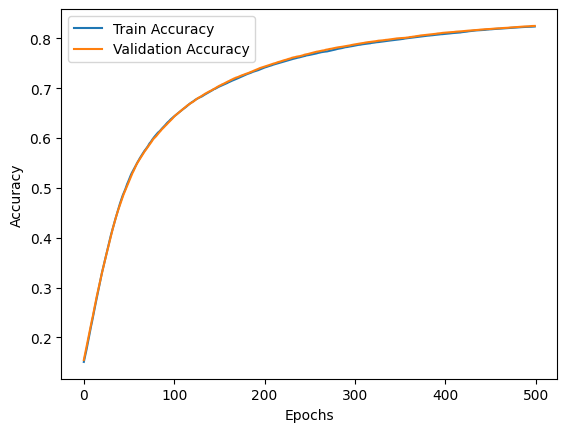

313/313 [==============================] - 1s 3ms/step - loss: 0.7903 - accuracy: 0.8358
Test Loss: 0.790328323841095
Test Accuracy: 0.8357999920845032
Time taken: 71.58126497268677


In [18]:
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_6.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T12-T11}')